In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
#import pprint
#import time 
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
#from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
df = pd.read_csv('Accidents_categorical.csv')

In [4]:
df.head()

,Accident_Index,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,...,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,201001BS70015,51.492045,-0.178376,London,Urban,A,2,30,Dual carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,1896,Heavy oil,Volkswagen,Taxi,Going ahead,Slight
1,201001BS70034,51.485058,-0.168572,London,Urban,B,8,30,Single carriageway,Dry,...,T or staggered junction,Mid Junction - on roundabout or on main road,Front,Other/Not known,599,Petrol,Honda,Motorcycle,Going ahead,Slight
2,201001BS70040,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
3,201001BS70045,51.494743,-0.195845,London,Urban,A,7,30,Single carriageway,Wet or damp,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Offside,Other/Not known,649,Petrol,Other,Motorcycle,Moving off,Slight
4,201001BS70060,51.514170,-0.207760,London,Urban,B,5,30,Single carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,600,Petrol,Suzuki,Motorcycle,Going ahead,Slight


In [5]:
#pandas_profiling.ProfileReport(df)

In [6]:
df.dtypes

Accident_Index              object
Latitude                   float64
Longitude                  float64
Region                      object
Urban_or_Rural_Area         object
X1st_Road_Class             object
Driver_IMD_Decile            int64
Speed_limit                  int64
Road_Type                   object
Road_Surface_Conditions     object
Weather                     object
High_Wind                   object
Lights                      object
Datetime                    object
Year                         int64
Season                       int64
Month_of_Year                int64
Day_of_Month                 int64
Day_of_Week                  int64
Hour_of_Day                float64
Number_of_Vehicles           int64
Age_of_Driver                int64
Age_of_Vehicle               int64
Junction_Detail             object
Junction_Location           object
X1st_Point_of_Impact        object
Driver_Journey_Purpose      object
Engine_CC                    int64
Propulsion_Code     

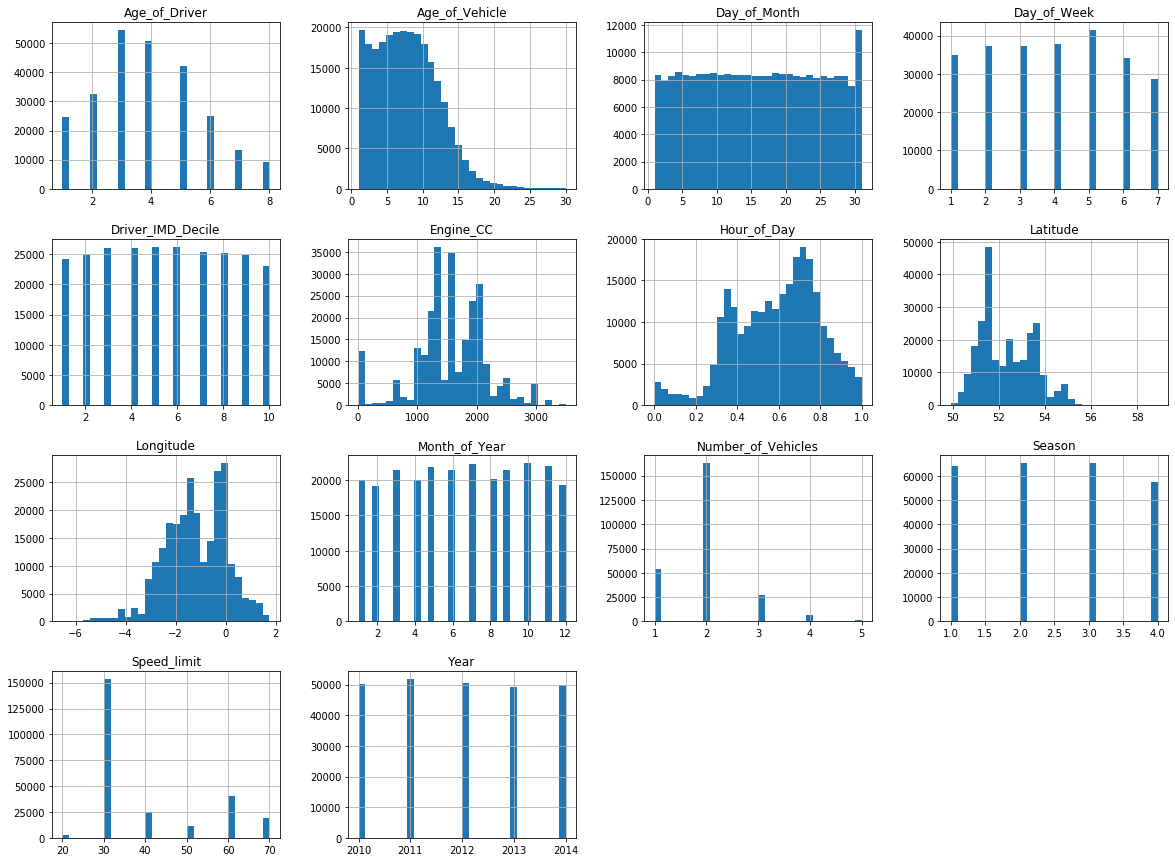

In [7]:
df.hist(figsize=(20,15), bins=30);

In [8]:
X = df.Accident_Index
df.drop(columns=['Accident_Index','Datetime'], inplace=True)

In [9]:
#df.select_dtypes(include=['object'])
col_list = list(df.select_dtypes(include=['object']).columns)

In [10]:
col_list

['Region',
 'Urban_or_Rural_Area',
 'X1st_Road_Class',
 'Road_Type',
 'Road_Surface_Conditions',
 'Weather',
 'High_Wind',
 'Lights',
 'Junction_Detail',
 'Junction_Location',
 'X1st_Point_of_Impact',
 'Driver_Journey_Purpose',
 'Propulsion_Code',
 'Vehicle_Make',
 'Vehicle_Category',
 'Vehicle_Manoeuvre',
 'Accident_Severity']

In [11]:
df = pd.get_dummies(data=df, columns=col_list)

In [13]:
np.log(df)

/Users/Janelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/Janelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,Latitude,Longitude,Driver_IMD_Decile,Speed_limit,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,...,Vehicle_Manoeuvre_Overtaking,Vehicle_Manoeuvre_Parked,Vehicle_Manoeuvre_Reversing,Vehicle_Manoeuvre_Slowing or stopping,Vehicle_Manoeuvre_Turning left,Vehicle_Manoeuvre_Turning right,Vehicle_Manoeuvre_U-turn,Vehicle_Manoeuvre_Waiting to go,Accident_Severity_Fatal_Serious,Accident_Severity_Slight
0,3.941427,NaN,0.693147,3.401197,7.605890,1.386294,0.000000,1.945910,1.386294,-0.106472,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
1,3.941292,NaN,2.079442,3.401197,7.605890,1.386294,0.000000,3.178054,1.945910,-0.652005,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
2,3.941497,NaN,1.945910,3.401197,7.605890,1.386294,0.000000,2.944439,0.693147,-0.316082,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
3,3.941480,NaN,1.945910,3.401197,7.605890,1.386294,0.000000,3.295837,1.098612,-0.274437,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
4,3.941857,NaN,1.609438,3.401197,7.605890,1.386294,0.693147,1.609438,1.609438,-1.358679,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
5,3.941575,NaN,1.098612,3.401197,7.605890,1.386294,0.693147,2.079442,0.000000,-0.744440,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,0.0
6,3.941436,NaN,1.609438,3.401197,7.605890,1.386294,1.098612,1.098612,1.098612,-1.320507,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
7,3.941675,NaN,0.693147,3.401197,7.605890,1.386294,1.098612,1.386294,1.386294,-0.569161,...,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,0.0
8,3.941675,NaN,1.386294,3.401197,7.605890,1.386294,1.098612,1.386294,1.386294,-0.569161,...,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
9,3.942010,NaN,1.098612,3.401197,7.605890,1.386294,1.098612,2.484907,1.609438,-0.400478,...,0.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0


In [12]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=40)
pca_3 = PCA(n_components=60)

principalComponents = pca_1.fit_transform(df)
principalComponents = pca_2.fit_transform(df)
principalComponents = pca_3.fit_transform(df)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=30)
principalComponents = pca.fit_transform(df)
print(np.sum(pca.explained_variance_ratio_))

0.9999853097414972
0.9999943687862162
0.9999976994761438
0.9999910989457721
